<a href="https://colab.research.google.com/github/Shree-Divya-Ganesh/Shree-Divya-Ganesh/blob/master/Prophet_Model_Ver_0.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FB Prophet Algorithm 

## Forecasting Daily minimum Temperature of Melbourne


### Importing Necessary Libraries

In [0]:
# IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet   
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.express as px


### Importing Daily Temperature dataset 

In [3]:
from google.colab import files
uploaded = files.upload()

Saving temperature_dataset.xlsx to temperature_dataset.xlsx


Daily Minimum Temperature in Melbourne consists of temperatures measured in Celsius for a period of 10 years ( 1981 - 1990 )

In [0]:
temperature_data = pd.read_excel('temperature_dataset.xlsx')

### Data Handling

dataframe.shape : returns m rows and n columns available in the dataset


In [5]:
temperature_data.shape

(3650, 2)

describe( ) : provides a statistical summary with Inter Quartile Range and Descriptive Statistics ( Mean, Minimum, Maximum, Standard Deviation )


In [6]:
temperature_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,3650.0,11.177753,4.071837,0.0,8.3,11.0,14.0,26.3


head( ) : returns first five rows from the dataframe

In [7]:
temperature_data.head()

,date,temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Renaming Column names into 'ds' and 'y'

Prophet model takes only two columns as input. The column name should be '**ds**' for datestamp and '**y**' representing numeric values.

  Column **ds** in general can be

      *   date format ( YYYY-MM-DD )
      *   timestamp format ( YYYY-MM-DD HH:MM:SS )



In [8]:
temperature_data.columns=['ds','y']

temperature_data.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Exploratory Data Analysis


#### Using Plotly Library for Visualization of Temperature

Interactive Time Series Line Plot using Plotly. 

The data ranges from 1981 to 1990 with daily period. 

X-axis represents datestamp 'ds' column and Y-axis represents temeprature 'y' column.

In [9]:
fig = px.line(temperature_data, x='ds', y='y')
fig.show()

### Train Test Split

It is very important to have more number of data points in training set which makes the model learn from different scenarios.  

Here, 

*   Train set ranges from January 1981 to December 1989 ( Nine years ). 

*   Test set covers one year of data points ( January 1990 - December 1990 )




In [0]:
train_set = temperature_data[(temperature_data['ds'] >= '1981-01-01') & (temperature_data['ds'] <= '1989-12-31')]
test_set = temperature_data[(temperature_data.ds >= '1990-01-01')]

The number of observations present in training set is 3285 days and that of test set is 365 days

In [11]:
print(train_set.shape , test_set.shape)

(3285, 2) (365, 2)


### Training Prophet model with customized parameters to capture the trends/seasonality

#### Understanding of Parameters

There are few parameter components which are to be known and understood to make maximum out of the model for high-quality forecasts.

Listed below are the parameters which will be covered.

*   Growth
*   Seasoanlity
*   Saturating Growth
*   Changepoints
*   Regressors
*   Holidays / Events

We can also adjust the parameter values for the listed components which reflects in our model results.  









Brief description on each parameter and its functions.



**Growth :**

      
  Based on the nature and its trend of the data , we will be able to define growth as either ***linear*** or ***logistic***.

  1. growth = 'linear' 

      This parameter with value set to 'linear' implies that there is a linear trend in the data , which can be decided by plotting the time series data. 

  2. growth = 'logistic'

      'Logistic' parameter value impies that there is a non-linear trend present in the data. 

        If the growth parameter is set to 'logistic', then saturating growth will come into action. 

    Saturating Growth : 

        The maximum capacity 'cap' and the minimum value 'floor' should be assigned to the dataset before 
        the Prophet instance is fit.

        Also, future set should be assigned with 'cap' and 'floor' value
        before being forecasted.


**Seasonality** 

  1. seasonality_mode

      Prophet adds the effects of seasonality as ***additive*** or ***multiplicative*** to the trend in forecasts.


            *   Additive seasonality means constant trend seen throughout the dataset.

            *   Multiplicative seasonality means there is fluctuations in trend seen throughout the dataset. 
                Example : Sales encountered in festival months 

  
  
  2. Custom seasonality ( add_seasonality )
 
      Prophet allows to tweak and adjust seasonality components with respect to daily, hourly, weekly, monthly, quarterly and yearly basis.
 
      These components take arguments such as ***name*** , ***period*** and ***fourier_order***
 
          *   Name represents the seasonality ( daily / hourly / yearly ).

          *   Period represents the repetition of trend in a number of days.

              Example : If there a daily seasonality, period will be 1, representing there will be trend to be captured on everyday basis.
                        Similarly, for yearly seasonality , period will be 365. 

          *   Fourier order represents order we want the movement of data. 

              Example : If fourier_order is set to lesser value , there will be no changes trend graph.
                        Where as, if the order is set to higher value such as 24 , 48 , etc., we will be able to see huge difference in trend graph.





**Changepoints** :

  Changepoints means at which rate the changes are to be detected.
          
    Inorder to tune the model that faces 'overfitting' or 'underfitting' problems,
    the 'changepoints_prior_scale' can be adjusted.

    To visualize the changepoints in the dataset, 'add_changepoints_to_plot' function can be imported from fbprophet library.

  [Automatic Changepoint Detection - Prophet](https://facebook.github.io/prophet/docs/trend_changepoints.html#automatic-changepoint-detection-in-prophet)



**Additional regressor** :

  Additional regressor can be added to the model using '***add_regressor***' function.  

  A column with the regressor should assigned to the dataframe before fit method 
        and to future dataframe before forecast method. 


    Example : 

        def week_ends(ds):
            if ds.weekday() >= 5 : # To check if week day is saturday / sunday
                return 1
            else :
                return 0

        This function can be added to the dataframe as :

              m = Prophet()
              m.add_regressor('week_ends')
              m.fit(dataframe)
      


**Holidays / Events** :

  An important feature that has to be to taken in account while forecasting is 'holidays' or any 'events' that took place or will take place in the near future.

  This feature will priorly be able to monitor and capture the changes in trends on the holidays / events. 

    Methods to specify the holiday dates are as follows:
                
      *  Built-in function 
            
            add_country_holidays function takes argument 'country_name' to be specified.

            There are approximately 13 countries that can be specified as shown below.

                  m = Prophet(holidays= holidays)
                  m.add_country_holidays(country_name = 'US')

      *  User defined dates

            Creating a dataframe with the dates with column names 'holidays' and 'ds'.

      
  All the holidays that are captured into account can be seen using 'm.train_holiday_names' function.





In [68]:
# Prophet Instance with changepoints and custom seasonalities
m = Prophet(growth='logistic',seasonality_mode='multiplicative',changepoint_prior_scale=0.1,daily_seasonality=True).add_seasonality(name='yearly',period=365,fourier_order=48).add_seasonality(name='quarterly',period=91.25,fourier_order=48)

# Creating a column named 'cap' and assigning value as 30 ( i.e., the forecasted values will be not be greater than 30 )

train_set['cap'] = 30

# Creating a column named 'floor' and assigning value as 0 ( i.e., the forecasted values will not be lesser than 0 )

train_set['floor'] = 0

#Fitting the Prophet Instance with the training set. 

m.fit(train_set)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.


#### Defining Future set

make_future_dataframe is a function with parameters '**periods**' and '**freq**' ( Frequency ). 

*Periods* represents future 'number of days' we want our model to forecast. 

    Example : periods = 7 ( 1 week ) 
              periods = 365 ( 1 Year )

*Frequency* ( freq ) represents the required measurement of time. 

  Defualt value is set to 'D' ( Days )
  There are many measures like 'min' and 'H' .

    Example : freq = '30min' (1981-01-01 05:30:00, 1981-01-01 06:00:00)
              freq = 'H'     (1981-01-01 05:00:00,1981-01-01 06:00:00 )



In [69]:
future_set = m.make_future_dataframe(periods=365) # periods = 365 ( number of days in a year in 365 / Number of records in test set  )

# Creating column named 'cap' with value set to 30. 

future_set['cap'] = 30 #User-Defined value

# Creating column named 'floor' with value set to 0. 

future_set['floor'] = 0

future_set.head()

,ds,cap,floor
0,1981-01-01,30,0
1,1981-01-02,30,0
2,1981-01-03,30,0
3,1981-01-04,30,0
4,1981-01-05,30,0


### Forecasting the temperature for the defined period and visualizing the forecast components

Forecasting on the specified future dataframe can be done using 'predict' function. 

This will make the forecasts with period and frequency mentioned. 

      Forecasting using Prophet will provide a wide range of results with upper limit and lower limit as end result. 

      'yhat' column consists of the predicted value. 

In [0]:
# m.predict method to forecast the specified future set.

forecast_df = m.predict(future_set)

Forecasts can be visualized using Prophet.plot method. 

    This will plot the actual data points and the performance of the model which captures the data trend. 




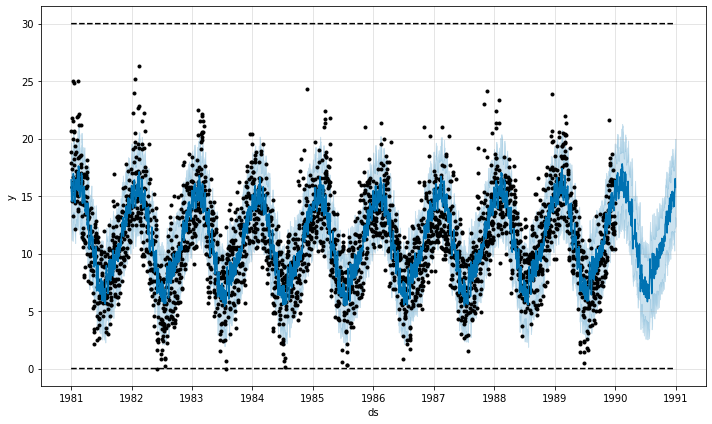

In [71]:
# m.plot method will generate a graph with actual and captured pattern in the forecasted set

figure_forecast = m.plot(forecast_df)


The components of the forecasts such as 'trend' , 'seasonality' , 'Impact of additional regressor' can be visualized. 


    Prophet.plot_components methos will provide with the results.

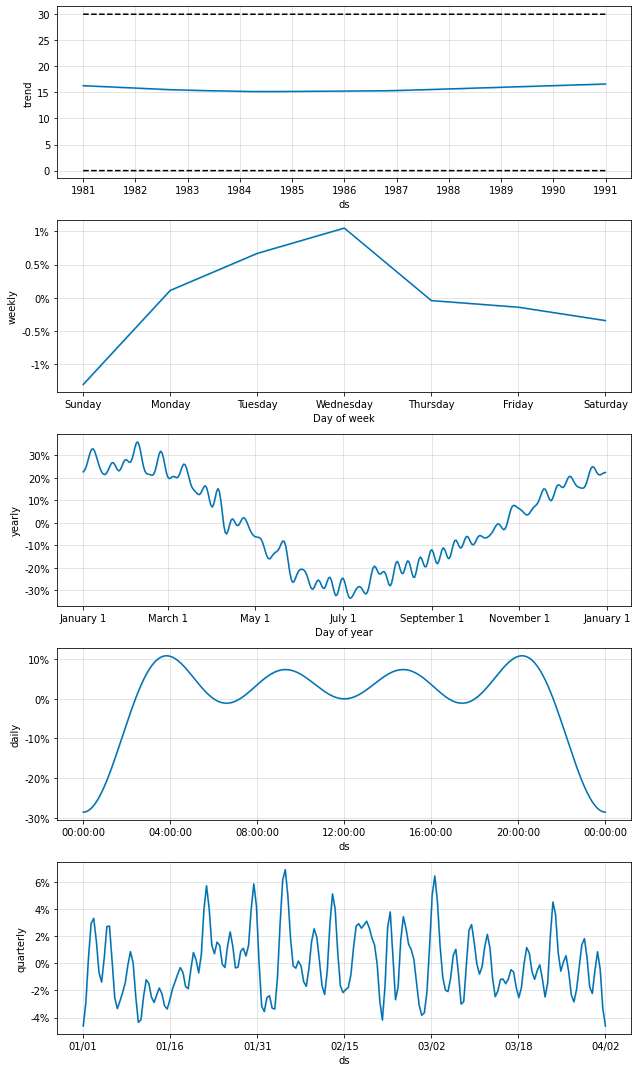

In [72]:
# m.plot_components will generate graph on trend / seasonality

figure_forecast_components = m.plot_components(forecast_df)

Overview of the forecasted dataframe. 

In [73]:
forecast_df.head()

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,quarterly,quarterly_lower,quarterly_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1981-01-01,16.298516,30,0,12.943769,19.646333,16.298516,16.298516,-0.285888,-0.285888,-0.285888,0.006959,0.006959,0.006959,0.045949,0.045949,0.045949,-0.000414,-0.000414,-0.000414,0.247312,0.247312,0.247312,0.0,0.0,0.0,16.411935
1,1981-01-02,16.297225,30,0,12.391991,18.884524,16.297225,16.297225,-0.285888,-0.285888,-0.285888,-0.053301,-0.053301,-0.053301,-0.002785,-0.002785,-0.002785,-0.001414,-0.001414,-0.001414,0.236786,0.236786,0.236786,0.0,0.0,0.0,15.428571
2,1981-01-03,16.295934,30,0,12.008345,18.696755,16.295934,16.295934,-0.285888,-0.285888,-0.285888,-0.058579,-0.058579,-0.058579,0.006029,0.006029,0.006029,-0.003427,-0.003427,-0.003427,0.224707,0.224707,0.224707,0.0,0.0,0.0,15.341333
3,1981-01-04,16.294643,30,0,11.293853,17.852985,16.294643,16.294643,-0.285888,-0.285888,-0.285888,-0.104872,-0.104872,-0.104872,-0.022086,-0.022086,-0.022086,-0.013055,-0.013055,-0.013055,0.216156,0.216156,0.216156,0.0,0.0,0.0,14.585787
4,1981-01-05,16.293353,30,0,11.170944,18.302082,16.293353,16.293353,-0.285888,-0.285888,-0.285888,-0.089146,-0.089146,-0.089146,-0.017838,-0.017838,-0.017838,0.001115,0.001115,0.001115,0.213464,0.213464,0.213464,0.0,0.0,0.0,14.840857


### Actual vs Predicted Values


  Observed values ( Actuals ) and Predicted values should be merged with respect to date for model performance and evaluation. 

  This helps us to know if there are any possible tuning can be done wo get improvized better results.


In [0]:
actual_forecasted = forecast_df.set_index(['ds'])[['yhat']].join(test_set.set_index('ds')).dropna()
actual_forecasted.reset_index(inplace=True)
actual_forecasted['ds'] = actual_forecasted.ds.astype(str)
actual_forecasted.set_index(['ds'],inplace=True)

In [75]:
actual_forecasted.head()

,yhat,y
ds,,
1990-01-01,15.423458,14.8
1990-01-02,14.917351,13.3
1990-01-03,15.005665,15.6
1990-01-04,15.426364,14.5
1990-01-05,15.100560,14.3


In [76]:
actual_forecasted.columns=['predicted','actual']
actual_forecasted.head()

,predicted,actual
ds,,
1990-01-01,15.423458,14.8
1990-01-02,14.917351,13.3
1990-01-03,15.005665,15.6
1990-01-04,15.426364,14.5
1990-01-05,15.100560,14.3


### Visualizing actual temperatures vs forecasted temperature


Text(0.5, 1.0, 'Actual vs Forecasted values')

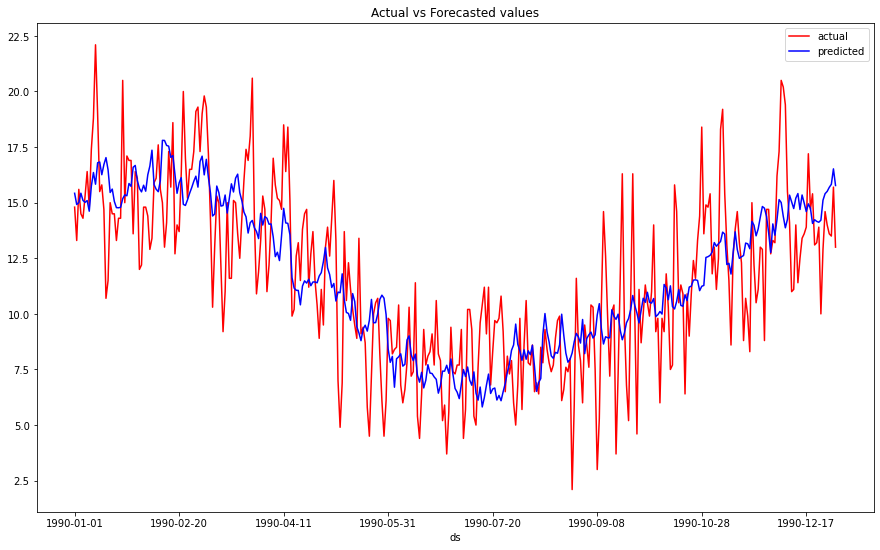

In [77]:
plt.figure(figsize=(15,9))
actual_forecasted['actual'].plot(color='red')
actual_forecasted['predicted'].plot(color='blue')
plt.legend(loc='best')
plt.title('Actual vs Forecasted values')

The above plot shows actual values and predicted values

Residuals represents the difference between actual and predicted values. 

    The maximum residual is 6.4 and minimum is -7.

In [78]:
actual_forecasted['residual'] = actual_forecasted['actual'] - actual_forecasted['predicted']
actual_forecasted.describe().T

,count,mean,std,min,25%,50%,75%,max
predicted,365.0,11.748838,3.244034,5.815357,8.927736,11.398311,14.793049,17.803684
actual,365.0,11.669589,3.861600,2.100000,8.700000,11.400000,14.600000,22.100000
residual,365.0,-0.079249,2.601818,-6.945164,-1.560951,-0.207595,1.480820,7.463925


### Model Evaluation and Performance Metrics 



Few of the evaluation metrics for time series forecasting are :

  1. Mean Absolute Error ( M.A.E )
  2. Mean Squared Error ( M.S.E )
  3. Root Mean Squared Error ( R.M.S.E )

In [79]:
mean_forecast_error = np.mean(actual_forecasted.residual)

mean_absolute_error = np.mean(abs(actual_forecasted.residual))

mean_squared_error = np.mean(actual_forecasted.residual ** 2)

root_mean_squared_error = np.sqrt(mean_squared_error)

print(' Minimum Forecast Error : ' ,actual_forecasted.residual.min())

print('\n Maximum Forecast Error : ' ,actual_forecasted.residual.max())

print('\n Mean absolute error : ' , mean_absolute_error)

print('\n Mean sqaured error : ' , mean_squared_error)

print('\n Root Mean sqaured error : ' , root_mean_squared_error)


 Minimum Forecast Error :  -6.945163736001222

 Maximum Forecast Error :  7.463925118912343

 Mean absolute error :  2.030082065223819

 Mean sqaured error :  6.757191429023919

 Root Mean sqaured error :  2.59945983408552


We are able to see how Prophet has worked with time series forecasting. 
The results show lesser forecast error rate. 

### Diagnostics - Prophet

Prophet provides Diagnostic functionality which allows cross validation for measuring the error rate in the forecasts. 

This functionality can be used using 

        from fbprophet.diagnostics import cross_validation

Brief description on Diagnostics parameters . 

The Diagnostic should be performed on the Prophet instance. 


*   Initial ( optional )
*   Period
*   Horizon
*   Cutoff
*   Units

Initial : 

    This is an optional parameter that can be passed to define to number of training period. 

Period : 

    To define the number of days forecasts to be conducted.

Horizon :

    The forecast will be performed on the specified number of days. 

Cutoff :

    Cutoff is generally the difference of maximum of ds in dataset to specified horizon. 

              cutoff = max(dataset['ds']) - horizon 

Units : 

    Units is the measurement of time based on the dataset. It can be 'days' or 'hours'.



Example :

    m = Prophet () 
    m.fit(train_set)
    
        cross_validation(m, initial = '3285' , period = '365' , horizon = '365' , units = 'days' )

( or )

        cross_validation(m, initial = '3285 days' , period = '365 days' , horizon = '365 days')


In [87]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

# Prophet Instance with changepoints and custom seasonalities
m = Prophet(growth='logistic',seasonality_mode='multiplicative',changepoint_prior_scale=0.1,daily_seasonality=True).add_seasonality(name='yearly',period=365,fourier_order=48).add_seasonality(name='quarterly',period=91.25,fourier_order=48)

# Creating a column named 'cap' and assigning value as 30 ( i.e., the forecasted values will be not be greater than 30 )

temperature_data['cap'] = 30

# Creating a column named 'floor' and assigning value as 0 ( i.e., the forecasted values will not be lesser than 0 )

temperature_data['floor'] = 0

#Fitting the Prophet Instance with the training set. 

m.fit(temperature_data)

df_cv = cross_validation(m, initial='3285 days', period='365 days',horizon='365 days')


INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Making 1 forecasts with cutoffs between 1989-12-31 00:00:00 and 1989-12-31 00:00:00


In [88]:
df_cv.shape


(365, 6)

#### Performance Metrics 

Performance Metrics consists of few metrics such as 

* Mean Squared Error ( M.S.E )
* Root Mean Squared Error ( R.M.S.E )
* Mean Absolute Error ( M.A.E )
* Mean Absolute Percentage Error ( M.A.P.E )


The *performance_metrics* function will result in performance metrics for specified horizon as a dataframe. 

In [89]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,5.747309,2.397354,1.725219,0.117647,0.072777,0.861111
1,37 days,6.127125,2.475303,1.812066,0.124551,0.078077,0.833333
2,38 days,6.490368,2.547620,1.877178,0.129385,0.078077,0.805556
3,39 days,6.480767,2.545735,1.863086,0.128479,0.078077,0.805556
4,40 days,6.463727,2.542386,1.851095,0.127558,0.078077,0.805556


The metrics can be visualized using *plot_cross_validation_metric*. 

The metric argument can be any of the mentioned metrics. 

        The plot consists of horizon ( number of days ) in the x-axis and the metric ( say metric = 'mse' ) in y-axis. 

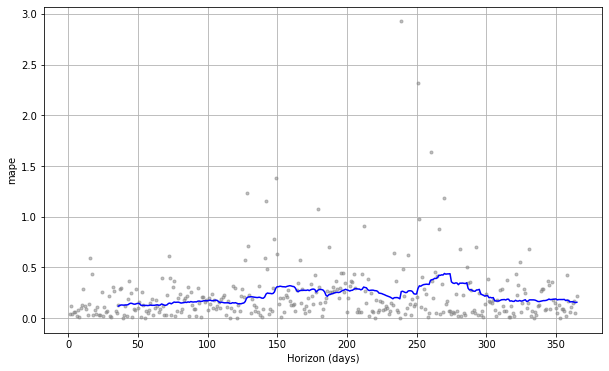

In [90]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

#### Visualization of Observed values and forecasted values using Cross Validation

Text(0.5, 1.0, 'Actual vs Forecasted')

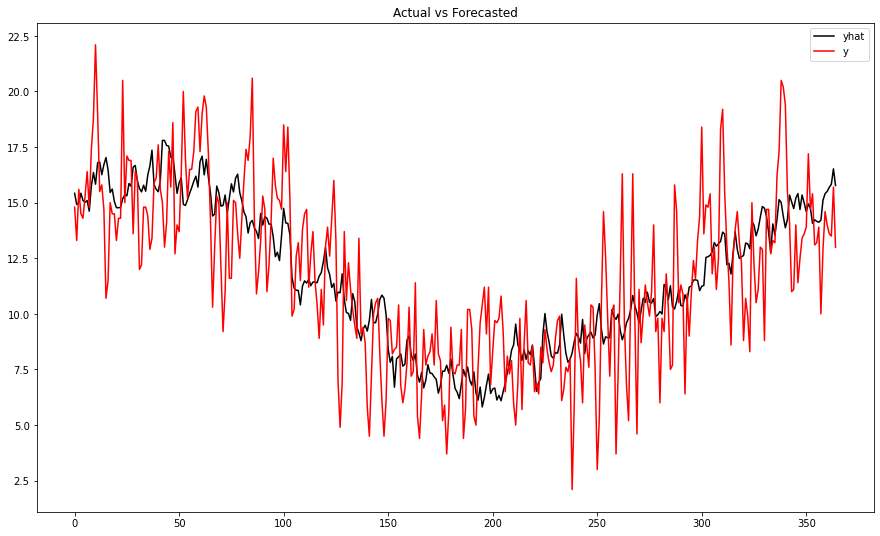

In [91]:
plt.figure(figsize=(15,9))
df_cv['yhat'].plot(color='black')
df_cv['y'].plot(color='red')
plt.legend(loc='best')
plt.title('Actual vs Forecasted')

In [0]:
df_cv['residual'] = df_cv['y'] - df_cv['yhat']

#### Cross Validation Model Evaluation

In [93]:
mean_forecast_error = np.mean(df_cv.residual)

mean_absolute_error = np.mean(abs(df_cv.residual))

mean_squared_error = np.mean(df_cv.residual ** 2)

root_mean_squared_error = np.sqrt(mean_squared_error)

print(' Minimum Forecast Error : ' ,actual_forecasted.residual.min())

print('\n Maximum Forecast Error : ' ,actual_forecasted.residual.max())

print('\n Mean absolute error : ' , mean_absolute_error)

print('\n Mean sqaured error : ' , mean_squared_error)

print('\n Root Mean sqaured error : ' , root_mean_squared_error)


 Minimum Forecast Error :  -6.945163736001222

 Maximum Forecast Error :  7.463925118912343

 Mean absolute error :  2.030082065223819

 Mean sqaured error :  6.757191429023919

 Root Mean sqaured error :  2.59945983408552


### Conclusion 

Results of Time Series forecasting using Prophet provides efficient forecasts with tunable parameters. 

Diagnostic functionality in Prophet helps in measuring forecast errors in an easy way. 

The forecasts can be improvised further by fine tuning the parameters. 


